In [1]:
cd /content/drive/My Drive/Dava with ML

/content/drive/My Drive/Dava with ML


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as m

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
ls

 breast-cancer-wisconsin-data.zip   hepatiits_dataset.zip
 Cancer.ipynb                       hepatities.ipynb
 cardiovaskular_dataset.zip         hepatitisdata.csv
 chronic-kidney-disease.zip         indian_liver_patient.csv
'covid pnemonia.ipynb'              indian-liver-patient-records.zip
 data.csv                           kidney.ipynb
 Dataset_spine.csv                  liver.ipynb
 dataset.zip                        model_cancer5.h5
 degree_cancer_5.tflite             model_cancer8.h5
 degree_cancer_8.tflite             model_covid.h5
 degree_covid_mobilenet.tflite      model_diabeties.h5
 degree_covid.tflite                model_heart.h5
 degree_covid_vgg.tflite            model_kidney.h5
 degree_diabeties.tflite            new_model.csv
 degree_heart.tflite                parkinson_dataset.zip
 degree_kidney.tflite               Parkinson.ipynb
 degree_liver.tflite                pd_speech_features.csv
 degreeliver.tflite                 pima-indians-diabetes-database.zip
 de

In [4]:
dataset=pd.read_csv('Dataset_spine.csv')
dataset

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal,NaN
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal,NaN
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal,NaN
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal,NaN


In [5]:
dataset=dataset.drop(['Unnamed: 13'],axis=1)

In [6]:
dataset

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


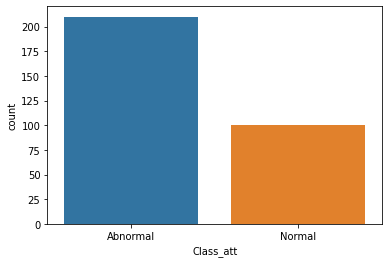

In [7]:
sns.countplot(x='Class_att',data=dataset)

In [8]:
dataset

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Class_att']=le.fit_transform(dataset['Class_att'])

In [10]:
dataset['Class_att'].unique()

array([0, 1])

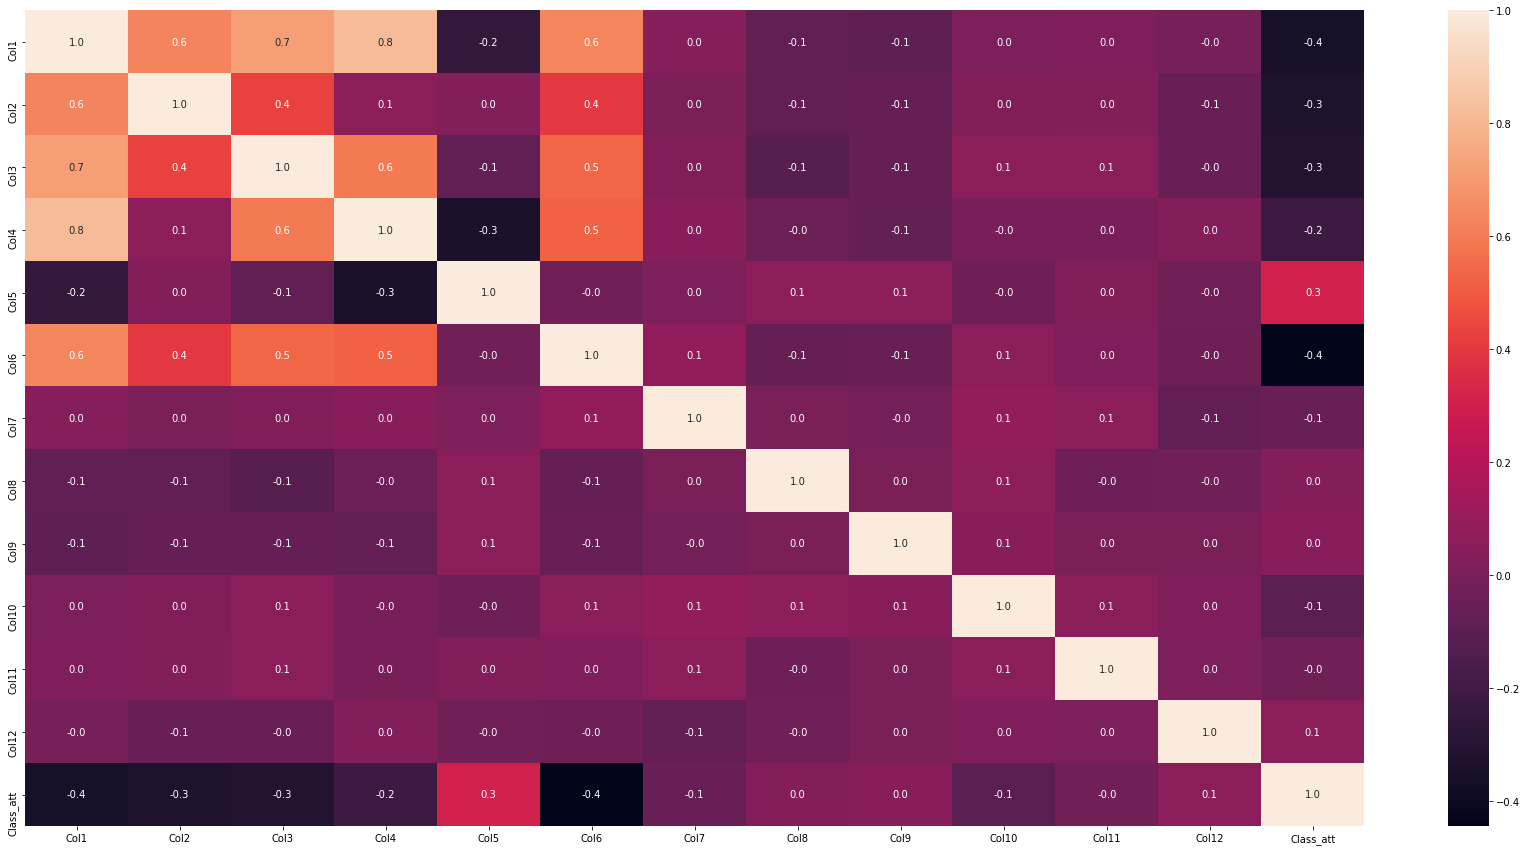

In [11]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [12]:
dataset.drop('Col2',inplace=True,axis=1)

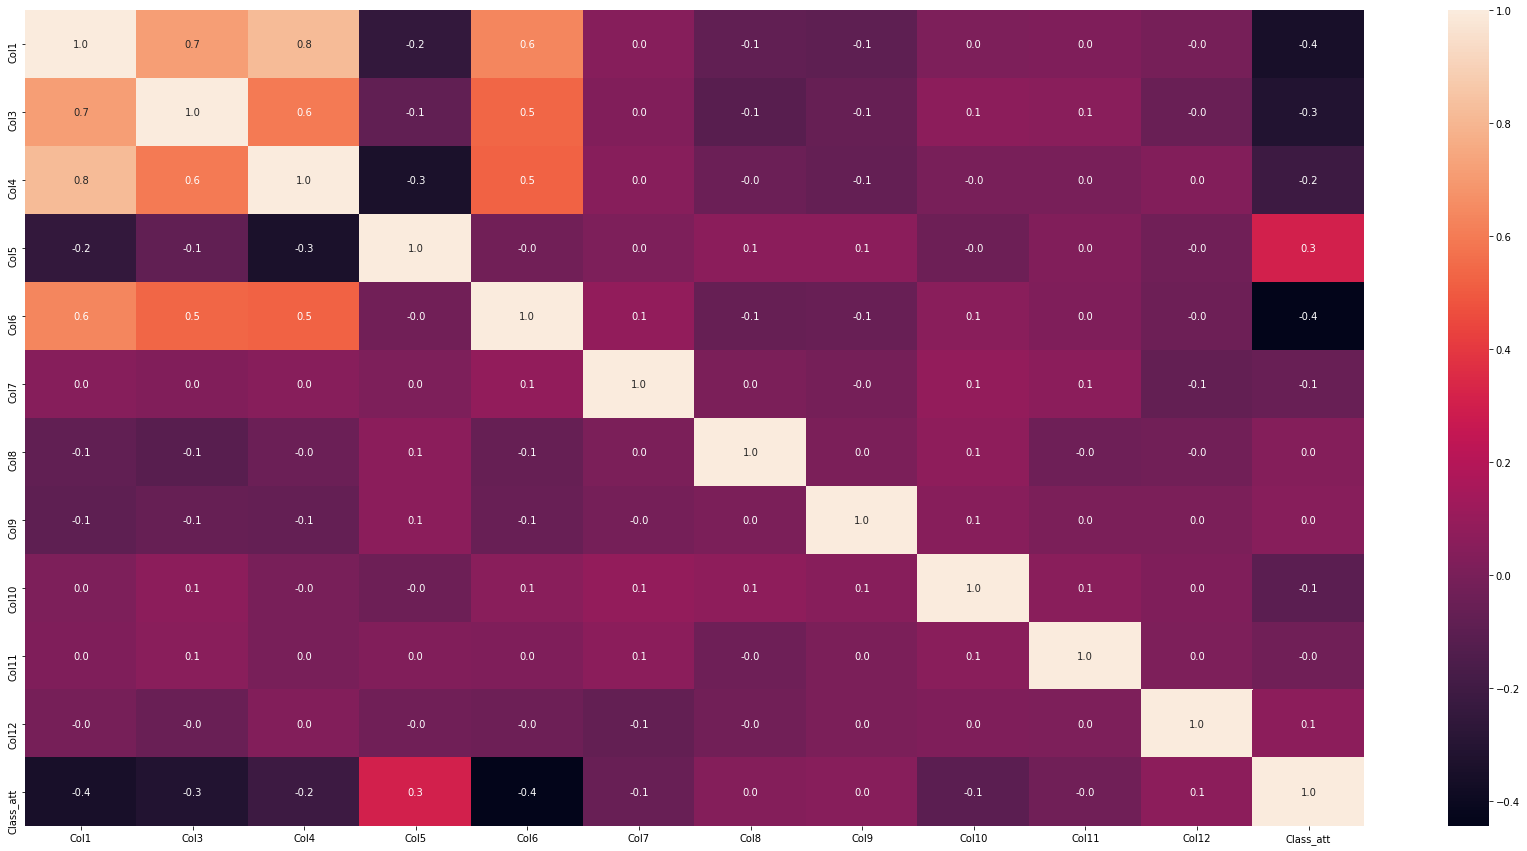

In [13]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [14]:
dataset.drop('Col3',inplace=True,axis=1)

In [15]:
dataset.drop('Col4',inplace=True,axis=1)

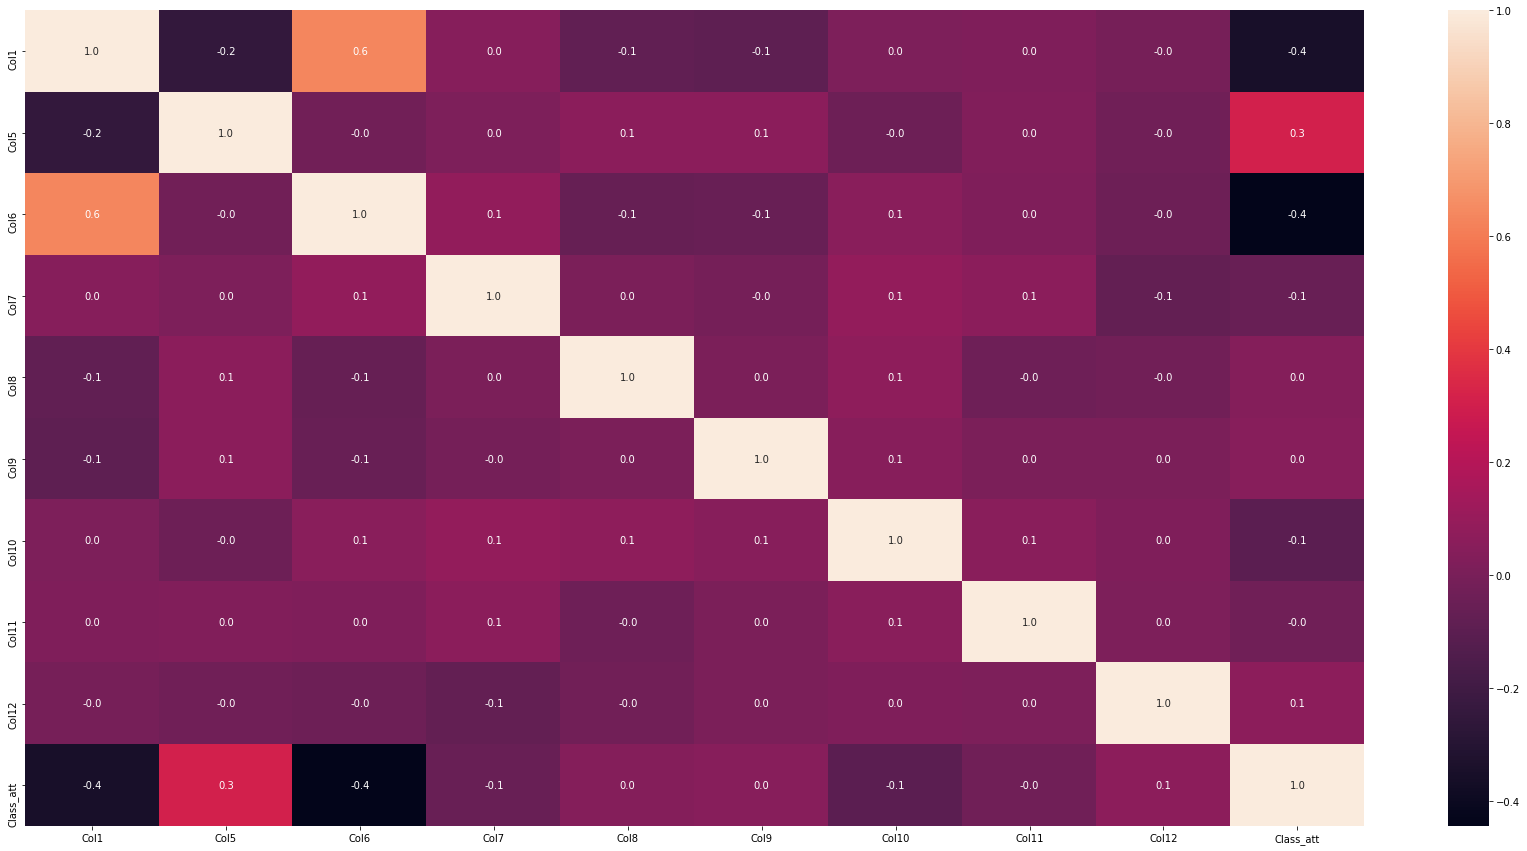

In [16]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [17]:
dataset.drop('Col6',inplace=True,axis=1)

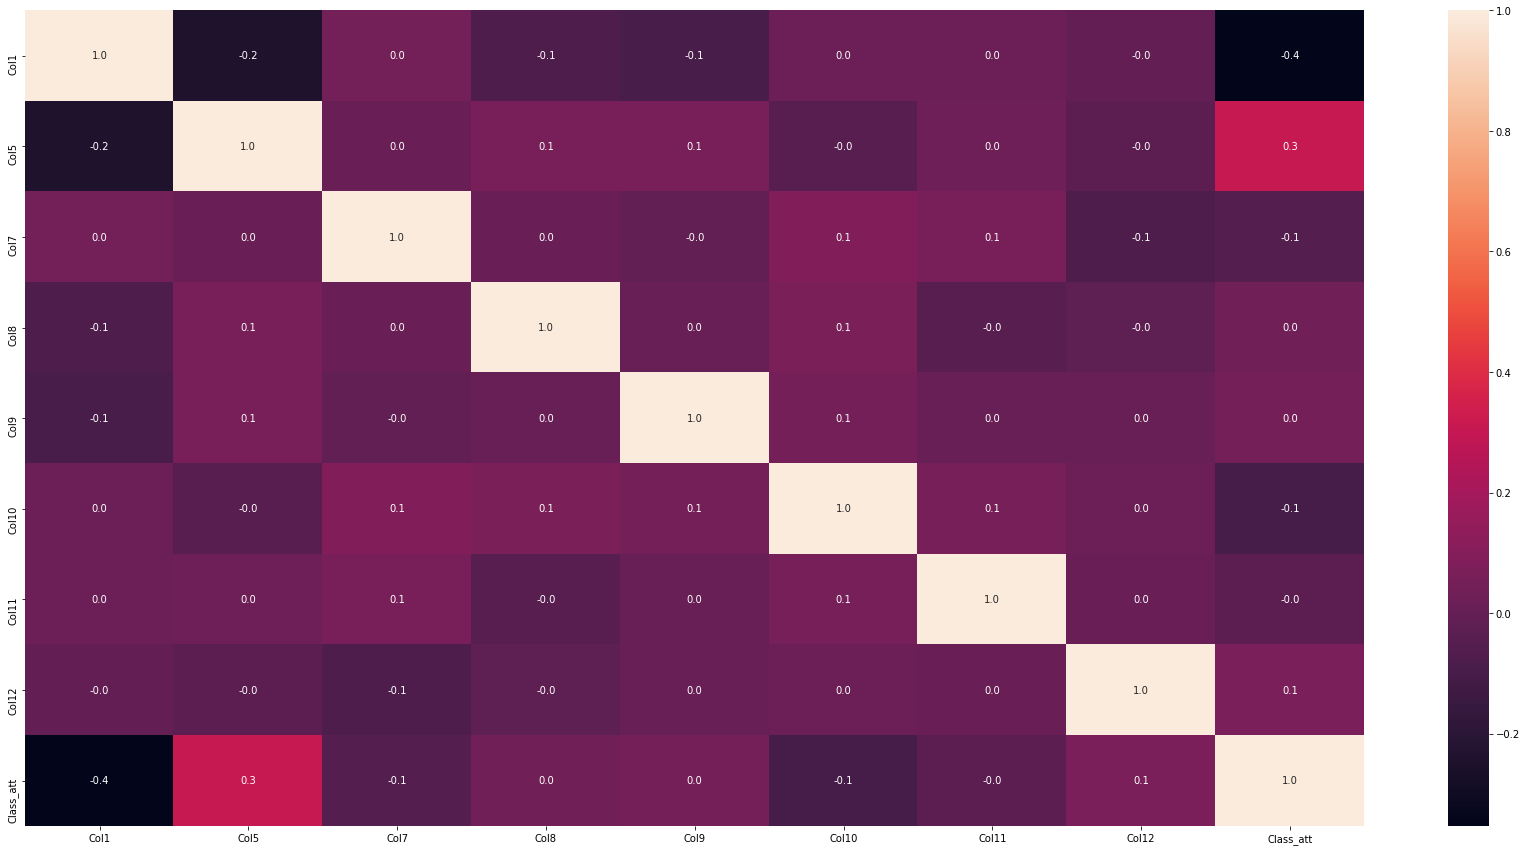

In [18]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [19]:
le.classes_

array(['Abnormal', 'Normal'], dtype=object)

In [20]:
features=dataset.iloc[:,:-1]

In [21]:
features

,Col1,Col5,Col7,Col8,Col9,Col10,Col11,Col12
0,63.027818,98.672917,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,114.405425,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,105.985135,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,101.868495,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,108.168725,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171
...,...,...,...,...,...,...,...,...
305,47.903565,117.449062,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472
306,53.936748,114.365845,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693
307,61.446597,125.670725,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151
308,45.252792,118.545842,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192


In [22]:
labels=dataset.iloc[:,-1]

In [23]:
labels

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: Class_att, Length: 310, dtype: int64

In [24]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.2,random_state=42)

##Logistic Regression

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(feature_train,label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.7419354838709677

In [ ]:
label_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
label_test.tolist()

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0]

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        44
           1       0.57      0.44      0.50        18

    accuracy                           0.74        62
   macro avg       0.68      0.65      0.66        62
weighted avg       0.73      0.74      0.73        62



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[38  6]
 [10  8]]


##KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':list(np.arange(1,20))}


In [ ]:
model=GridSearchCV(knn,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
model.best_params_

{'n_neighbors': 8}

In [ ]:
model=KNeighborsClassifier(n_neighbors=8)
model.fit(feature_train,label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.7096774193548387

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        44
           1       0.50      0.39      0.44        18

    accuracy                           0.71        62
   macro avg       0.64      0.61      0.62        62
weighted avg       0.69      0.71      0.70        62



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[37  7]
 [11  7]]


In [ ]:
label_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
label_test

289    1
9      0
57     0
60     0
25     0
      ..
198    0
195    0
210    1
224    1
158    0
Name: Class_att, Length: 62, dtype: int64

##Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
param={'max_depth':list(np.arange(1,20))}


In [ ]:
model=GridSearchCV(dt,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

In [ ]:
model.best_params_

{'max_depth': 2}

In [ ]:
model=DecisionTreeClassifier(max_depth=5)
model.fit(feature_train,label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.7096774193548387

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79        44
           1       0.50      0.61      0.55        18

    accuracy                           0.71        62
   macro avg       0.66      0.68      0.67        62
weighted avg       0.73      0.71      0.72        62



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[33 11]
 [ 7 11]]


In [ ]:
label_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
label_test

289    1
9      0
57     0
60     0
25     0
      ..
198    0
195    0
210    1
224    1
158    0
Name: Class_att, Length: 62, dtype: int64

##SVM

In [ ]:
model=SVC(kernel='linear')
model.fit(feature_train,label_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.7580645161290323

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        44
           1       0.59      0.56      0.57        18

    accuracy                           0.76        62
   macro avg       0.71      0.70      0.70        62
weighted avg       0.75      0.76      0.76        62



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[37  7]
 [ 8 10]]


In [ ]:
label_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
label_test

289    1
9      0
57     0
60     0
25     0
      ..
198    0
195    0
210    1
224    1
158    0
Name: Class_att, Length: 62, dtype: int64

#Neural Networks

In [25]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [26]:
from keras.utils.np_utils import to_categorical
label_train=to_categorical(label_train)
label_test=to_categorical(label_test)

In [27]:
feature_train.shape

(248, 8)

In [28]:
model=Sequential()
model.add(Dense(512,input_shape=[8],activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4608      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 5,634
Trainable params: 5,634
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(feature_train,label_train,epochs=1000)

Epoch 1/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.9427 - accuracy: 0.5605
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.3927 - accuracy: 0.6371
Epoch 3/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.0642 - accuracy: 0.5968
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.8751 - accuracy: 0.6371
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.5235 - accuracy: 0.6613
Epoch 6/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.4922 - accuracy: 0.7056
Epoch 7/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.7318 - accuracy: 0.6774
Epoch 8/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.5553 - accuracy: 0.6895
Epoch 9/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.2780 - accuracy: 0.6694
Epoch 10/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.3658 - accuracy: 0.6774
Epoch 11/1000
8/8 [

In [31]:
label_pred=model.predict(feature_test)

In [32]:
label_pred

array([[1.34017348e-01, 8.70174825e-01],
       [9.99023318e-01, 8.76188278e-04],
       [4.44419384e-02, 9.60117877e-01],
       [4.92727101e-01, 5.08045852e-01],
       [8.14334154e-01, 1.83479875e-01],
       [9.10099924e-01, 8.91265869e-02],
       [6.58165693e-01, 3.42389017e-01],
       [9.99952972e-01, 3.94170311e-05],
       [9.99102831e-01, 7.90357590e-04],
       [4.34998363e-01, 5.65961719e-01],
       [2.49534845e-04, 9.99834538e-01],
       [1.00000000e+00, 6.58357417e-17],
       [1.76622957e-01, 8.25456083e-01],
       [1.64793253e-01, 8.26936126e-01],
       [7.36016631e-01, 2.62440473e-01],
       [3.16690505e-02, 9.70088482e-01],
       [2.91565484e-05, 9.99979734e-01],
       [9.99349833e-01, 6.85900450e-04],
       [9.61578488e-01, 3.66096795e-02],
       [1.00000000e+00, 4.06707873e-20],
       [9.99990344e-01, 9.09085975e-06],
       [1.00000000e+00, 3.34011654e-14],
       [1.00000000e+00, 2.40653719e-08],
       [1.00000000e+00, 1.08834630e-08],
       [9.996628

In [33]:
label_pred=np.argmax(label_pred,axis=1)

In [34]:
label_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [35]:
label_test=np.argmax(label_test,axis=1)
label_train=np.argmax(label_train,axis=1)

In [36]:
m.accuracy_score(label_test,label_pred)

0.7096774193548387

In [37]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.50      0.67      0.57        18

    accuracy                           0.71        62
   macro avg       0.67      0.70      0.68        62
weighted avg       0.74      0.71      0.72        62



In [38]:
print(m.confusion_matrix(label_test,label_pred))

[[32 12]
 [ 6 12]]


In [39]:
label_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [40]:
label_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [ ]:
import tensorflow
model.save('model_kidney.h5')

INFO:tensorflow:Assets written to: saved_model_kidney.pbtxt/assets


INFO:tensorflow:Assets written to: saved_model_kidney.pbtxt/assets


In [ ]:
# We need to create a TFLite Converter Object from model we created

converter = tensorflow.lite.TFLiteConverter.from_keras_model(model=model)

In [ ]:
# Create a tflite model object from TFLite Converter

tfmodel = converter.convert()

# Save TFLite model into a .tflite file 

open("degree_spine.tflite","wb").write(tfmodel)

23612